In [33]:
import pandas as pd
import datetime
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [7]:
one_hot = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/one_hot_truncated.csv",
                        parse_dates=['appl_sbm_tm'])

In [16]:
#data = data.drop('Unnamed: 0', axis=1)

In [9]:
# split the training set and the testing set
train_set = data[data['appl_sbm_tm'] < datetime.datetime(2017,3,30)]
test_set = data[data['appl_sbm_tm'] >= datetime.datetime(2017,3,30)]
train_data_set = train_set[(train_set.year <= 2017) & (train_set.month <= 5)]
valid_data_set = train_set[(train_set.year >= 2016) & (train_set.month > 5)]

In [10]:
test_set = test_set.drop(['appl_sbm_tm'], axis=1)
train_data_set = train_data_set.drop(['appl_sbm_tm'], axis=1)
valid_data_set = valid_data_set.drop(['appl_sbm_tm'], axis=1)

In [13]:
test_set = test_set.drop(['birthday'], axis=1)
train_data_set = train_data_set.drop(['birthday'], axis=1)
valid_data_set = valid_data_set.drop(['birthday'], axis=1)

In [18]:
test_set.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/test_one_hot.csv', index=False)
train_data_set.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/train_one_hot.csv', index=False)
valid_data_set.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/val_one_hot.csv', index=False)

In [19]:
test_set = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/test_one_hot.csv")
train_data_set = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/train_one_hot.csv")
valid_data_set = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/val_one_hot.csv")

In [14]:
x_train = train_data_set.drop(['target'], axis=1)
x_valid = valid_data_set.drop(['target'], axis=1)
x_test = test_set.drop(['target'], axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

### Logistic Regression

In [16]:
# Logistic Regression
classifier_logistic = LogisticRegression()

In [17]:
# Train the model
classifier_logistic.fit(x_train, train_data_set['target'])

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Accuracy of test data
classifier_logistic.score(x_valid, valid_data_set['target'])

0.9628092243186582

In [21]:
# Use 5-fold Cross Validation to get the accuracy 
cv_score = model_selection.cross_val_score(classifier_logistic, x_train, train_data_set['target'], cv=5)
print(cv_score)
print('Model accuracy of ' + 'Logistic Regression' + ' is ' + str(cv_score.mean()))

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.97544608 0.97560205 0.97568101 0.97567909 0.97575805]
Model accuracy of Logistic Regression is 0.9756332568664596


In [22]:
# Find Optimal Hyperparameters - LogisticRegression
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(x_train, train_data_set['target'])

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [25]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.9756490430168656
Best parameters set:
C:1
penalty:l1


In [26]:
# best model
best_LR_model = Grid_LR.best_estimator_

<Figure size 432x288 with 0 Axes>

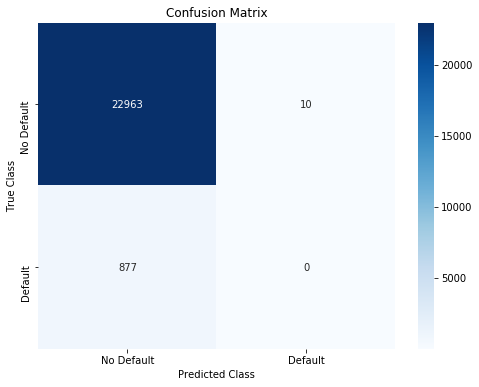

In [29]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(valid_data_set['target'],best_LR_model.predict(x_valid))
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

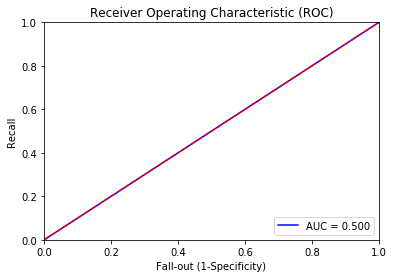

In [34]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(valid_data_set['target'],best_LR_model.predict(x_valid))
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()